import stuff

In [5]:
from dotenv import load_dotenv
import sys
sys.path.append("../")
from shared.models import MiniPileDataset
from shared.interp import count_non_zero_feature_activations, plot_feature_activation_histogram
from shared.features import Feature, FeatureSample
import os
import json

# Enable automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2


# Load environment variables from .env file
load_dotenv()

# Access the OpenAI API key from the environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")


In [16]:
id = "20240723_214753"

In [18]:
# Load the model from the pickle file
import pickle 
import sys

sys.path.append("../")
from shared.sparse_autoencoder import SparseAutoencoder, SparseAutoencoderConfig
import json

# load the dataset
sentences_file = "pickled_data/20240723_211713_sentences.npy"
embeddings_file = "pickled_data/20240723_211713_embeddings.npy"
mini_pile_dataset = MiniPileDataset(sentences_file, embeddings_file)

# Load the configuration from the JSON file
config_path = "sae/" + id + "/config.json"
with open(config_path, "r") as config_file:
    config = json.load(config_file)

# Load the pre-trained model from the pickle file
sae_config = SparseAutoencoderConfig(d_model=config["dimensions"], d_sparse=8 * config["dimensions"], sparsity_alpha=config["sparsity_alpha"])
model = SparseAutoencoder(sae_config)
model_path = "sae/" + id + "/sae.pkl"
with open(model_path, "rb") as f:
    model_state_dict = pickle.load(f)
    model.load_state_dict(model_state_dict)

In [19]:
# Load the log feature densities from the JSON file
log_feature_densities_path = "sae/20240723_213045/log_feature_densities.json"
with open(log_feature_densities_path, "r") as json_file:
    log_feature_densities = json.load(json_file)

print("Log feature densities loaded successfully.")


Log feature densities loaded successfully.


interpret the feature activations

len(filtered_feature_activations) 288


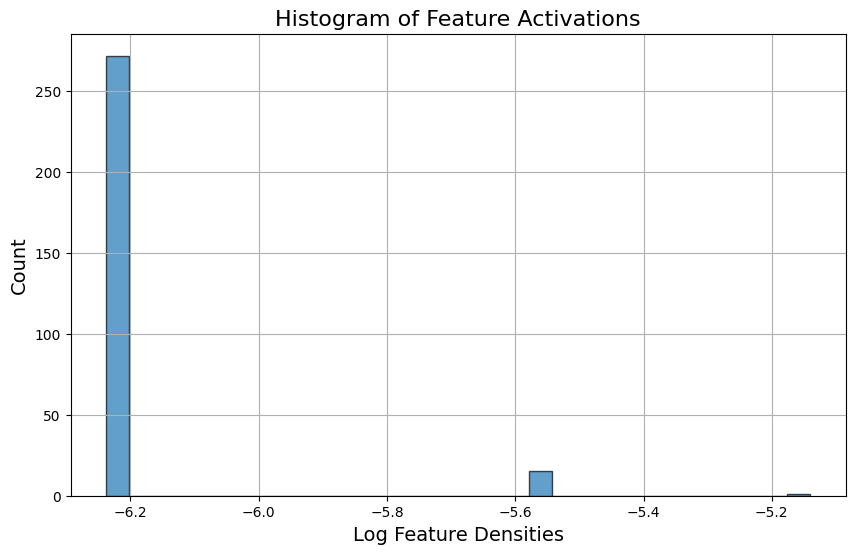

In [20]:
training_step = len(log_feature_densities) - 20
feature_activations = log_feature_densities[training_step]

# Filter out -inf values
filtered_feature_activations = [fa for fa in feature_activations if fa != -float('inf')]
print("len(filtered_feature_activations)", len(filtered_feature_activations))

import matplotlib.pyplot as plt

# Plotting the histogram of feature activations
plt.figure(figsize=(10, 6))
plt.hist(filtered_feature_activations, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Log Feature Densities", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Histogram of Feature Activations", fontsize=16)
plt.grid(True)
plt.show()


In [21]:
len(mini_pile_dataset)

652840

In [22]:
count_non_zero_feature_activations(model, mini_pile_dataset, 1000)

Average Non-Zero Elements for first 1000 samples: 26.378000259399414
Average Percentage of Non-Zero Elements: 0.43%


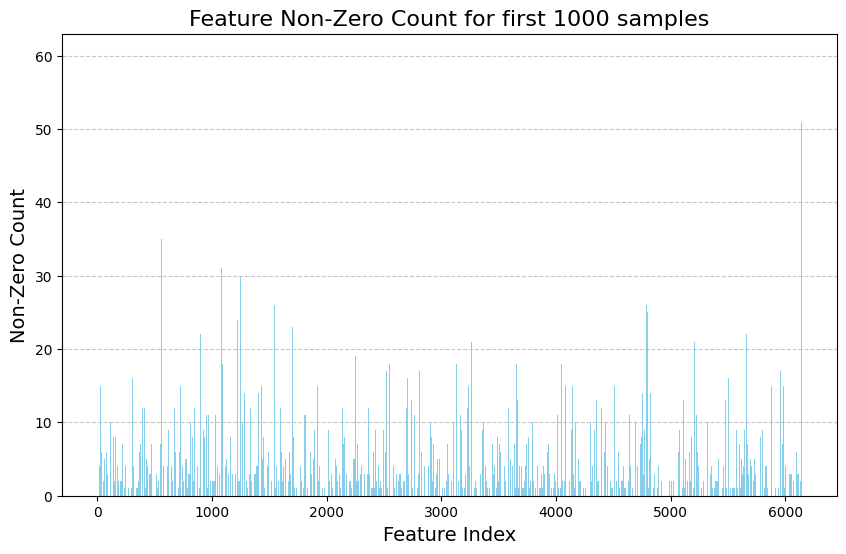

In [23]:
plot_feature_activation_histogram(model, mini_pile_dataset)

automated interp pipeline: analysis

In [7]:
import os
import json

features_folder = "features/sae_features_20240708_220948/"
features = []
filtered_out_count = 0

for filename in os.listdir(features_folder):
    if filename.startswith("feature_") and filename.endswith(".json"):
        with open(os.path.join(features_folder, filename), "r") as json_file:
            feature_data = json.load(json_file)
            feature = Feature(**feature_data)
            if len(feature.high_act_samples) >= 10:
                features.append(feature)
            else:
                filtered_out_count += 1

features.sort(key=lambda x: x.confidence, reverse=True)

print(f"Number of filtered out samples: {filtered_out_count}")

In [19]:
for feature in features[:200]:
    print(f"Index: {feature.index}, Label: {feature.label}, Confidence: {feature.confidence}")

Index: 616, Label: Scientific and conversational texts, Confidence: 100.0
Index: 285, Label: Diverse, multi-type, and multilingual content, Confidence: 100.0
Index: 552, Label: Technical and complex structured text, Confidence: 100.0
Index: 457, Label: Complex and diverse text formatting, Confidence: 100.0
Index: 477, Label: Contains multilingual text, Confidence: 100.0
Index: 748, Label: Technical and structured text with formatting, Confidence: 100.0
Index: 515, Label: Technical SQL and database tutorials, Confidence: 100.0
Index: 667, Label: Technical and scientific notations, Confidence: 100.0
Index: 488, Label: Diverse, context-rich text segments, Confidence: 100.0
Index: 502, Label: Complex mixed content, Confidence: 100.0
Index: 514, Label: Diverse and multilingual content, Confidence: 100.0
Index: 68, Label: Multilingual and structured content, Confidence: 100.0
Index: 350, Label: Multilingual and diverse topics, Confidence: 100.0
Index: 13, Label: Multilingual scientific and s